In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [2]:
df_gemini = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/direct_comparisons__22.csv')
df_qwen30b = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_30B.csv')
df_qwen30b_50 = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_resize_50.csv')
df_qwen30b_25 = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_resize_25.csv')
df_qwen30b_10 = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_resize_10.csv')
common_filenames = set(df_gemini['filename'])
common_filenames &= set(df_qwen30b['filename'])
common_filenames &= set(df_qwen30b_50['filename'])
common_filenames &= set(df_qwen30b_25['filename'])
common_filenames &= set(df_qwen30b_10['filename'])

print(f"Total common filenames: {len(common_filenames)}")

# Filter each dataframe to keep only common filenames
df_gemini = df_gemini[df_gemini['filename'].isin(common_filenames)].copy()
df_qwen30b = df_qwen30b[df_qwen30b['filename'].isin(common_filenames)].copy()
df_qwen30b_50 = df_qwen30b_50[df_qwen30b_50['filename'].isin(common_filenames)].copy()
df_qwen30b_25 = df_qwen30b_25[df_qwen30b_25['filename'].isin(common_filenames)].copy()
df_qwen30b_10 = df_qwen30b_10[df_qwen30b_10['filename'].isin(common_filenames)].copy()

# Select only metadata from Gemini (no metrics)
df_gemini_select = df_gemini[['filename', 'phase', 'Stroke']]

# Select columns and rename for Qwen models
df_qwen30b_select = df_qwen30b[['filename', 'accuracy', 'recall_s', 'recall_f']].rename(columns={
    'accuracy': 'accuracy_Qwen30B',
    'recall_s': 'recall_s_Qwen30B',
    'recall_f': 'recall_f_Qwen30B'
})

df_qwen30b_50_select = df_qwen30b_50[['filename', 'accuracy', 'recall_s', 'recall_f']].rename(columns={
    'accuracy': 'accuracy_Qwen30B_50%',
    'recall_s': 'recall_s_Qwen30B_50%',
    'recall_f': 'recall_f_Qwen30B_50%'
})

df_qwen30b_25_select = df_qwen30b_25[['filename', 'accuracy', 'recall_s', 'recall_f']].rename(columns={
    'accuracy': 'accuracy_Qwen30B_25%',
    'recall_s': 'recall_s_Qwen30B_25%',
    'recall_f': 'recall_f_Qwen30B_25%'
})

df_qwen30b_10_select = df_qwen30b_10[['filename', 'accuracy', 'recall_s', 'recall_f']].rename(columns={
    'accuracy': 'accuracy_Qwen30B_10%',
    'recall_s': 'recall_s_Qwen30B_10%',
    'recall_f': 'recall_f_Qwen30B_10%'
})

# Merge all dataframes (Gemini only for metadata)
df_merged = df_gemini_select.merge(df_qwen30b_select, on='filename', how='inner') \
                            .merge(df_qwen30b_50_select, on='filename', how='inner') \
                            .merge(df_qwen30b_25_select, on='filename', how='inner') \
                            .merge(df_qwen30b_10_select, on='filename', how='inner')

# Reorder columns (no Gemini metrics)
column_order = [
    'filename', 'phase', 'Stroke',
    'accuracy_Qwen30B', 'recall_s_Qwen30B', 'recall_f_Qwen30B',
    'accuracy_Qwen30B_50%', 'recall_s_Qwen30B_50%', 'recall_f_Qwen30B_50%',
    'accuracy_Qwen30B_25%', 'recall_s_Qwen30B_25%', 'recall_f_Qwen30B_25%',
    'accuracy_Qwen30B_10%', 'recall_s_Qwen30B_10%', 'recall_f_Qwen30B_10%'
]

df_merged = df_merged[column_order]

print(f"\nMerged dataframe shape: {df_merged.shape}")
print(f"Columns: {df_merged.columns.tolist()}")
print("\nFirst few rows:")
print(df_merged.head())

Total common filenames: 9

Merged dataframe shape: (9, 15)
Columns: ['filename', 'phase', 'Stroke', 'accuracy_Qwen30B', 'recall_s_Qwen30B', 'recall_f_Qwen30B', 'accuracy_Qwen30B_50%', 'recall_s_Qwen30B_50%', 'recall_f_Qwen30B_50%', 'accuracy_Qwen30B_25%', 'recall_s_Qwen30B_25%', 'recall_f_Qwen30B_25%', 'accuracy_Qwen30B_10%', 'recall_s_Qwen30B_10%', 'recall_f_Qwen30B_10%']

First few rows:
                          filename  phase Stroke  accuracy_Qwen30B  \
0  AZ_R2_2024-12-14_1.csv_BALANCED  early      n          0.750000   
1   K_R2_2025-02-04_1.csv_BALANCED   Late      y          0.826923   
2  FJ_R3_2024-07-29_1.csv_BALANCED   Late      y          0.714286   
3  FJ_R2_2024-07-15_1.csv_BALANCED  early      y          0.833333   
4  FU_R2_2024-07-18_1.csv_BALANCED  early      n          0.875000   

   recall_s_Qwen30B  recall_f_Qwen30B  accuracy_Qwen30B_50%  \
0          1.000000          0.500000              0.687500   
1          0.769231          0.884615              0.846154 

/tmp/ipykernel_1565624/1669443624.py:56: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


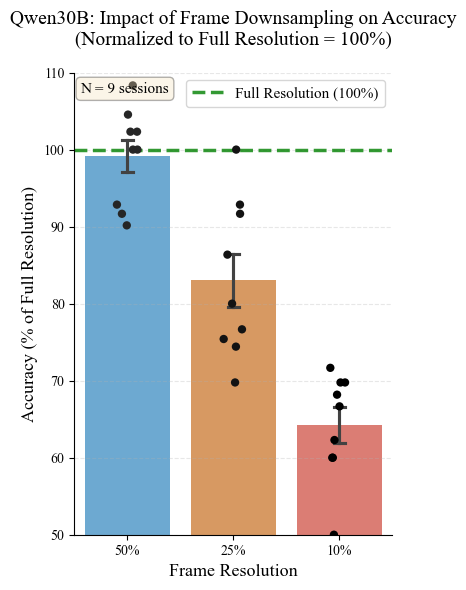

Plot saved!

Summary Statistics: Normalized Accuracy (% of Full Resolution)

                 mean        std       sem  count
resolution                                       
10%         64.260569   6.893828  2.297943      9
25%         83.016666  10.173793  3.391264      9
50%         99.135299   6.239050  2.079683      9

Performance Degradation from Full Resolution
50%  : 99.1% (↓ 0.9% from full)
25%  : 83.0% (↓ 17.0% from full)
10%  : 64.3% (↓ 35.7% from full)

Statistical Tests (Wilcoxon Signed-Rank, paired)
50% vs Full: p = 0.6115 ns
25% vs Full: p = 0.0117 *
10% vs Full: p = 0.0039 **



/home/murph_4090ws/miniconda3/envs/mpi_analysis/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, wilcoxon
plt.rcParams['font.family'] = 'Times New Roman'

# Calculate normalized accuracy (relative to full Qwen30B)
df_merged['accuracy_50%_normalized'] = (df_merged['accuracy_Qwen30B_50%'] / df_merged['accuracy_Qwen30B']) * 100
df_merged['accuracy_25%_normalized'] = (df_merged['accuracy_Qwen30B_25%'] / df_merged['accuracy_Qwen30B']) * 100
df_merged['accuracy_10%_normalized'] = (df_merged['accuracy_Qwen30B_10%'] / df_merged['accuracy_Qwen30B']) * 100

# Melt for plotting
df_melt = df_merged.melt(
    id_vars=["filename"],
    value_vars=['accuracy_50%_normalized', 'accuracy_25%_normalized', 'accuracy_10%_normalized'],
    var_name="resolution",
    value_name="normalized_accuracy"
)

# Clean up resolution names
df_melt["resolution"] = df_melt["resolution"].str.replace("accuracy_", "").str.replace("_normalized", "")

# Drop NaN values
df_melt = df_melt.dropna(subset=["normalized_accuracy"])

# Create figure
fig, ax = plt.subplots(figsize=(4, 6))

# Colors for different resolutions
resolution_colors = {
    "50%": "#3498db",   # Blue
    "25%": "#e67e22",   # Orange
    "10%": "#e74c3c"    # Red
}

resolution_order = ["50%", "25%", "10%"]

# Bar plot
sns.barplot(
    data=df_melt,
    x="resolution",
    y="normalized_accuracy",
    hue="resolution",
    order=resolution_order,
    hue_order=resolution_order,
    errorbar="se",
    capsize=0.1,
    palette=resolution_colors,
    ax=ax,
    alpha=0.8,
    legend=False
)

# Scatter individual points
sns.stripplot(
    data=df_melt,
    x="resolution",
    y="normalized_accuracy",
    hue="resolution",
    order=resolution_order,
    hue_order=resolution_order,
    dodge=False,
    jitter=True,
    size=6,
    color='black',#palette=resolution_colors,
    ax=ax,
    legend=False
)

# Styling
ax.axhline(y=100, color='green', linestyle='--', linewidth=2.5, alpha=0.8, label='Full Resolution (100%)')
ax.set_ylim(50, 110)
ax.set_ylabel("Accuracy (% of Full Resolution)", fontsize=13)
ax.set_xlabel("Frame Resolution", fontsize=13)
ax.set_title('Qwen30B: Impact of Frame Downsampling on Accuracy\n(Normalized to Full Resolution = 100%)', 
             fontsize=14, pad=20)

# Add sample size in upper left (moved from lower left)
n_samples = df_melt.groupby("filename").ngroups
ax.text(0.02, 0.98, f'N = {n_samples} sessions', transform=ax.transAxes,
        fontsize=11, verticalalignment='top', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Legend moved to upper right
ax.legend(loc='upper right', fontsize=11)

# Add grid for easier reading
ax.grid(axis='y', alpha=0.3, linestyle='--')

sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('qwen30b_resolution_comparison_overall.svg', dpi=300, bbox_inches='tight')
plt.savefig('qwen30b_resolution_comparison_overall.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved!")

# Calculate and print statistics
print("\n" + "="*70)
print("Summary Statistics: Normalized Accuracy (% of Full Resolution)")
print("="*70)

summary = df_melt.groupby("resolution")["normalized_accuracy"].agg(['mean', 'std', 'sem', 'count'])
print("\n" + summary.to_string())

print("\n" + "="*70)
print("Performance Degradation from Full Resolution")
print("="*70)

for res in resolution_order:
    res_data = df_melt[df_melt["resolution"] == res]["normalized_accuracy"]
    mean_val = res_data.mean()
    degradation = 100 - mean_val
    print(f"{res:5s}: {mean_val:.1f}% (↓ {degradation:.1f}% from full)")

# Statistical tests (paired because same sessions)
print("\n" + "="*70)
print("Statistical Tests (Wilcoxon Signed-Rank, paired)")
print("="*70)

# Compare each downsampled version to 100%
for res in resolution_order:
    res_data = df_merged[f'accuracy_{res}_normalized'].dropna()
    baseline = pd.Series([100] * len(res_data))
    
    # Wilcoxon signed-rank test (paired, non-parametric)
    stat, p_value = wilcoxon(res_data, baseline)
    
    sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"{res} vs Full: p = {p_value:.4f} {sig}")

print("\n" + "="*70)